# Organising Data

**The data we are using here is a subset of Kaggle's Cat's and Dog's Dataset**

- The Data is stored in the directory cats-and-dogs:
- The Data is as Follows:
    - cats-and-dogs
      - train
        - cat : 24 images
        - dog : 24 images
      - valid
        - cat : 10 images
        - dog : 10 images
      - test
        - cat : 10 images
        - dog : 10 images

**In this example we have labeled the test Set.  If we wanted we could also keep it as test/unknown: 20 images** 

# Process The Data

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


We create path variables for train,valid and test set ; where the datas are

In [2]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path  = 'cats-and-dogs/test'

### Using ImageDataGenerator

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path,target_size = (224,224),
                                                         classes  = ['dog','cat'],batch_size=10)

Found 48 images belonging to 2 classes.


In [4]:
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path,target_size = (224,224),
                                                         classes  = ['dog','cat'],batch_size=4)

Found 20 images belonging to 2 classes.


In [5]:
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path,target_size = (224,224),
                                                         classes  = ['dog','cat'])

Found 20 images belonging to 2 classes.


- ImageDataGenerator.flow_from_directory() generates batches of Normalized Tensor Image data from respective data directories
- flow_from_directory()
   - We first Specify Path
   - Then we specify Target Size for resizing all images
   - The size specified here is determined by input size that neural network expects

In [6]:
print(train_batches.class_indices)
print(valid_batches.class_indices)
print(test_batches.class_indices)

{'dog': 0, 'cat': 1}
{'dog': 0, 'cat': 1}
{'dog': 0, 'cat': 1}


### Plotting Images with labels 

In [7]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if(type(ims[0]) is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize=figsize)
        cols=len(ims)
        for i in range(len(ims)):
            sp = f.add_subplot(rows,cols,i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i],fontsize=16)
            plt.imshow(ims[i],interpolation=None if interp else 'none')

- The function has been obtained from fast.ai
- There is no need to memorize the function ; just enjoy it

In [8]:
imgs,labels = next(train_batches)

```python
next(train_batches)
```
This is called to generate a batch of training images. We determined the batch size we determined while generating images

c:\users\abx9801\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


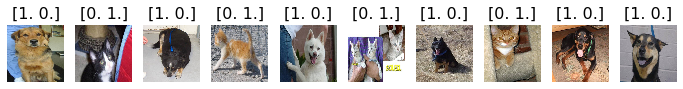

In [9]:
plots(imgs,titles=labels)

- The classes are as One-Hot-Encodings
```python
[1,0] - dogs
[0,1] - cats
```

# Creating and Training a CNNimage classifier with Keras

Building our model

In [10]:
model = Sequential([
        Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
        Flatten(),
        Dense(2,activation='softmax'),
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


```python
Conv2D(filters = f, kernel_size = (s,s), activation = 'required activation function', padding = 'valid' or 'same')
```
**if it is the first Convolutional Layer ; We will also specify input Size**
We can also add Pooling Layers
```python
MaxPooling2D(pool_size=(f,f),strides=s)
```
You can also specify Padding

- input shape was (224,224,3) bcoz; our image has 224x224 pixels and 3 color channels RGB
- We take softmax activation as output

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


Compiling Model

In [12]:
model.compile(optimizer = Adam(learning_rate=0.0001),loss = 'categorical_crossentropy',metrics=['accuracy'])

Training Model

In [13]:
model.fit_generator(generator = train_batches,validation_data=valid_batches,epochs=5,verbose=2)


Epoch 1/5
 - 3s - loss: 2361.0944 - accuracy: 0.4375 - val_loss: 2371.0664 - val_accuracy: 0.5000
Epoch 2/5
 - 1s - loss: 854.5055 - accuracy: 0.5833 - val_loss: 428.9793 - val_accuracy: 0.5000
Epoch 3/5
 - 1s - loss: 146.5653 - accuracy: 0.7500 - val_loss: 67.1840 - val_accuracy: 0.5000
Epoch 4/5
 - 2s - loss: 122.4964 - accuracy: 0.7292 - val_loss: 294.3362 - val_accuracy: 0.4500
Epoch 5/5
 - 1s - loss: 50.1200 - accuracy: 0.8333 - val_loss: 136.6658 - val_accuracy: 0.5000


- Another Way
```python
model.fit_generator(generator = train_batches,steps_per_epoch=4,
                    validation_data=valid_batches,validation_steps=4,epochs=5)
```
- We used model.fit ; but here we used model.fit generator()
- It fits the model Batch by Batch from batches generated by ImageDataGenerator
- We pass train_batches in generator
- steps_per_epochs is the no. of baches that it will take to complete one epoch;
    - Since we have 40 images and our batch size is 10 it will take 40/10 = 4 steps to complete one epoch
    - It is completely Ok not to specify it
- validation_steps is Counterpart of steps_per_epoch for validation data

**We Really got a very bad accuracy. It is bcoz it's just a test model with a random architecture. If we use Models with nice architectures we will Surely get better results**

# Prediction

Preparing the test sets

In [14]:
test_imgs,test_labels = next(test_batches)

Let us transform the labels simply so that;
```python
dog = 1
cat = 0
```

In [15]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0.], dtype=float32)

Prediction

In [16]:
predictions = model.predict_generator(generator = test_batches,verbose=1)

1/1 [==============================] - 0s 279ms/step


In [17]:
print(predictions)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [18]:
for k in predictions:
    if(k[0]>k[1]):
        k[0]=1
        k[1]=0
    else:
        k[0]=0
        k[1]=1

In [19]:
predictions = predictions[:,0]
predictions

array([1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0.], dtype=float32)

In [20]:
c=0
for i in range(len(predictions)):
    if(predictions[i]==test_labels[i]):
        c+=1
print('Accuracy : ', c*100/len(predictions))

Accuracy :  70.0


In [21]:
CM = confusion_matrix(y_true=test_labels,y_pred = predictions)
print(CM)

[[5 5]
 [1 9]]
